<a href="https://colab.research.google.com/github/ScienceMoo/DNA_structure_ML/blob/main/PositiveAndRandom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Read data

In [ ]:
import scipy.io
import numpy as np
from sklearn.model_selection import train_test_split
from scipy.special import softmax
import matplotlib.pyplot as plt
%matplotlib inline

import math
import seaborn; seaborn.set() # Plot styling
from seaborn import heatmap

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_folder = "/content/drive/MyDrive/Colab Notebooks"
file_name = "CTCF_sequences.mat"
file_path = file_folder + "/" + file_name

mat = scipy.io.loadmat(file_path, chars_as_strings=1, matlab_compatible=1)

sequences = mat['sequences2']
sequences = [word[2:17] for word_array in sequences for word in word_array[0]]
sequences = np.array(sequences)
num_sample, seq_length = sequences.shape[0], sequences.shape[1]
print("sequences.shape =", sequences.shape)
print("num_sample =", num_sample)
print("seq_length =", seq_length)
print("")
print("sequences =", sequences[:5])

# file_folder = "/content/drive/MyDrive/Colab Notebooks"
# file_name = "false_sequences.mat"
# file_path = file_folder + "/" + file_name

# mat = scipy.io.loadmat(file_path, chars_as_strings=1, matlab_compatible=1)

# false_sequences = mat['false_sequences']
# false_sequences = [word for word_array in false_sequences for word in word_array[0]]
# false_sequences = np.array(false_sequences)
# num_false_seq = false_sequences.shape[0]
# print("false_sequences.shape =", false_sequences.shape)
# print("num_false_seq =", num_false_seq)
# print("seq_length =", seq_length)
# print("")
# print("false_sequences =", false_sequences[:5])

file_folder = "/content/drive/MyDrive/Colab Notebooks"
file_name = "CTCF_strengths.mat"
file_path = file_folder + "/" + file_name

mat = scipy.io.loadmat(file_path, chars_as_strings=1, matlab_compatible=1)

strengths = mat['TF_scores']
strengths = strengths
strengths = [thing[0] for thing in strengths]
y = np.array(strengths)
print("")
print("y.shape =", y.shape)
print("y =", y[:10])

sequences.shape = (158004, 15)
num_sample = 158004
seq_length = 15

sequences = [['A' 'A' 'C' 'C' 'C' 'C' 'T' 'C' 'T' 'G' 'C' 'T' 'G' 'G' 'C']
 ['G' 'C' 'G' 'C' 'C' 'C' 'C' 'C' 'A' 'A' 'G' 'G' 'G' 'C' 'A']
 ['G' 'T' 'G' 'G' 'C' 'A' 'C' 'C' 'A' 'G' 'G' 'T' 'G' 'G' 'C']
 ['C' 'T' 'G' 'C' 'C' 'A' 'C' 'C' 'T' 'G' 'G' 'T' 'G' 'C' 'C']
 ['C' 'T' 'G' 'A' 'C' 'C' 'T' 'C' 'T' 'G' 'C' 'T' 'G' 'C' 'C']]

y.shape = (158004,)
y = [1.97 1.4  2.07 2.8  1.95 2.83 3.43 2.25 3.15 2.57]


In [ ]:
# Clean the data
inds = []
for idx, sequence in enumerate(sequences):
  if 'N' in sequence:
    inds.append(idx)

sequences = np.delete(sequences, inds, axis=0)
print("sequences.shape =", sequences.shape)
y = np.delete(y, inds, axis=0)
num_sample, seq_length = sequences.shape[0], sequences.shape[1]
print("num_sample =", num_sample)
print("seq_length =", seq_length)

# inds = []
# for idx, sequence in enumerate(false_sequences):
#   if 'N' in sequence:
#     inds.append(idx)

# false_sequences = np.delete(false_sequences, inds, axis=0)
# num_false_seq = false_sequences.shape[0]
# print("num_false_seq =", num_false_seq)

sequences.shape = (157999, 15)
num_sample = 157999
seq_length = 15


# Prepare data

In [ ]:
# Create negative data (random sequences with TF binding strength of 0)

# num_negative_data = num_sample*2
num_negative_data = round(num_sample / 2)

rand_seq = np.array([np.random.choice(['A', 'C', 'G', 'T'], num_negative_data, p=np.array([1,1,1,1])/4.0)
                for i in range(seq_length)]).transpose()
rand_seq[:5]

array([['C', 'C', 'A', 'T', 'G', 'T', 'G', 'C', 'A', 'G', 'T', 'C', 'A',
        'C', 'C'],
       ['G', 'T', 'G', 'C', 'G', 'G', 'T', 'T', 'A', 'G', 'T', 'G', 'G',
        'G', 'C'],
       ['T', 'C', 'G', 'T', 'G', 'T', 'A', 'G', 'G', 'T', 'G', 'G', 'T',
        'T', 'G'],
       ['A', 'A', 'T', 'A', 'T', 'A', 'A', 'A', 'C', 'C', 'G', 'G', 'C',
        'C', 'A'],
       ['G', 'A', 'G', 'G', 'A', 'A', 'G', 'A', 'C', 'C', 'G', 'A', 'C',
        'C', 'A']], dtype='<U1')

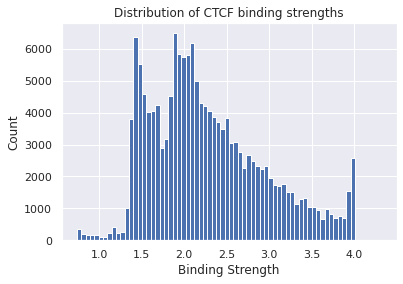

0.74
4.32


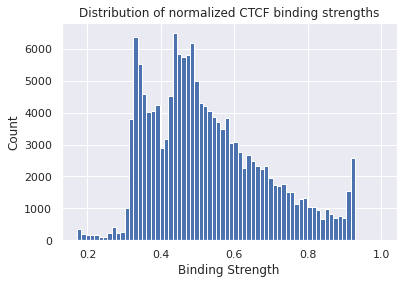

0.17129629629629628
1.0


In [ ]:
# Normalize target values
plt.hist(y, 70)
plt.xlabel("Binding Strength")
plt.ylabel("Count")
plt.title("Distribution of CTCF binding strengths")
plt.show()
print(min(y))
print(max(y))
y_normalized = y / max(y)
plt.hist(y_normalized, 70)
plt.xlabel("Binding Strength")
plt.ylabel("Count")
plt.title("Distribution of normalized CTCF binding strengths")
plt.show()
print(min(y_normalized))
print(max(y_normalized))

Training set shape: (236999, 15, 4)
Training set label shape: (236999,)

One-hot encoding looks like:
 [[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]


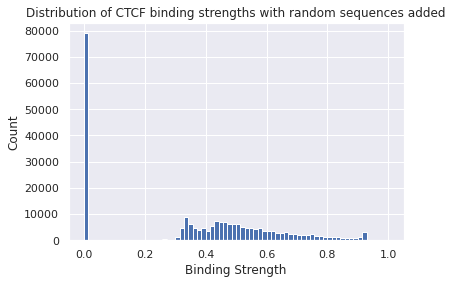

In [ ]:
# one-hot encoding
X = np.zeros(list(sequences.shape) + [4])
random_X = np.zeros(list(rand_seq.shape) + [4])
# false_X = np.zeros(list(false_sequences.shape) + [4])

base_dict = {'A': 0, 'C': 1, 'G': 2, 'T': 3}

for row in range(num_sample):
    for col in range(seq_length):
        X[row,col,base_dict[sequences[row,col]]] = 1

for row in range(num_negative_data):
    for col in range(seq_length):
        random_X[row,col,base_dict[rand_seq[row,col]]] = 1

# for row in range(num_false_seq):
#     for col in range(seq_length):
#         false_X[row,col,base_dict[false_sequences[row,col]]] = 1

# Combine real data with random sequences
X = np.vstack((X, random_X))
y = np.concatenate((y_normalized, np.zeros(num_negative_data)))

# X = np.vstack((X, random_X, false_X))
# y = np.concatenate((y, np.zeros(num_negative_data + num_false_seq)))

# X = np.vstack((X, false_X))
# y = np.concatenate((y, np.zeros(num_false_seq)))

print('Training set shape: {}'.format(X.shape))
print('Training set label shape: {}'.format(y.shape))
print('\nOne-hot encoding looks like:\n {}'.format(X[0,0:10,:]))

plt.hist(y, 70)
plt.xlabel("Binding Strength")
plt.ylabel("Count")
plt.title("Distribution of CTCF binding strengths with random sequences added")
plt.show()

In [ ]:
X, X_test, y, y_test = train_test_split(X, y, test_size=0.15)

# Deep Learning

In [ ]:
from keras.models import Sequential
from keras.layers import Conv1D, Dense, Flatten, Dropout
from keras.activations import relu
from keras.layers.pooling import MaxPooling1D
from keras.optimizers import SGD

# define the model
model = Sequential()
model.add(Conv1D(1, 15, padding='same', activation='relu', input_shape=(seq_length, 4)))

#sanity check for dimensions
print('Shape of the output of first layer: {}'.format(model.predict_on_batch(X[0:32,:,:]).shape))
# model.add(MaxPooling1D(2))

# model.add(Dropout(0))
model.add(Flatten())
model.add(Dense(1, activation='relu'))

sgd = SGD(lr=0.003, decay=1e-8, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd,
              loss='mean_squared_error',
              metrics=['mean_squared_error'])

hist = model.fit(X, y, validation_split=0.2, epochs=30, batch_size=32)  # starts training
model.evaluate(X_test, y_test)

model.summary()

Shape of the output of first layer: (32, 15, 1)
Epoch 1/10
5037/5037 [==============================] - 8s 2ms/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.0050 - val_mean_squared_error: 0.0050
Epoch 2/10
5037/5037 [==============================] - 8s 2ms/step - loss: 0.0045 - mean_squared_error: 0.0045 - val_loss: 0.0042 - val_mean_squared_error: 0.0042
Epoch 3/10
5037/5037 [==============================] - 7s 1ms/step - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.0035 - val_mean_squared_error: 0.0035
Epoch 4/10
5037/5037 [==============================] - 7s 1ms/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0032 - val_mean_squared_error: 0.0032
Epoch 5/10
5037/5037 [==============================] - 7s 1ms/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0030 - val_mean_squared_error: 0.0030
Epoch 6/10
5037/5037 [==============================] - 7s 1ms/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0029 -

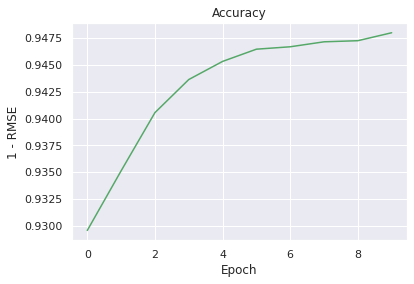

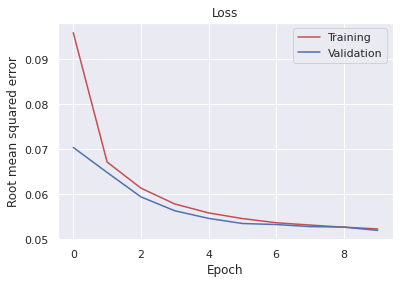

In [ ]:
# plt.plot(hist.epoch, hist.history['loss'], label="Training loss")
arr = np.array(hist.history['val_loss'])
arr = np.sqrt(arr)
arr = 1 - arr

plt.plot(hist.epoch, arr, 'g')
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("1 - RMSE")
plt.show()

arr1 = np.array(hist.history['val_loss'])
arr1 = np.sqrt(arr1)
arr2 = np.array(hist.history['loss'])
arr2 = np.sqrt(arr2)

plt.plot(hist.epoch, arr2, 'r', label="Training")
plt.plot(hist.epoch, arr1, 'b', label="Validation")
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Root mean squared error")
plt.legend()
plt.show()

In [ ]:
def my_softmax(row):
  if min(row) != 0:
    row = row - min(row)
  return row / sum(row)

In [ ]:
#have a look at the filter
convlayer = model.layers[0]
weights = convlayer.get_weights()[0].squeeze()
weights = weights * 100
weights = weights.astype(int)
# weights = np.apply_along_axis(my_softmax, 1, weights)
print('Convolution parameter shape: {}'.format(weights.shape))
print(weights)

Convolution parameter shape: (15, 4)
[[ -8  10  -4  -9]
 [-22 -15 -22 -19]
 [-17   6 -22  -1]
 [-17  16 -23   0]
 [ 29  24   7   7]
 [-20 -16 -36 -23]
 [-15   5   4  -6]
 [ -9  -3  -9  10]
 [ -2 -15  17  -8]
 [ -4  -3   3 -15]
 [ 31  35  26  29]
 [  0   5  16   8]
 [-19 -12   1  -1]
 [ -3   3  -3   0]
 [ -2   2  10  25]]


Convolution parameter shape: (15, 4)


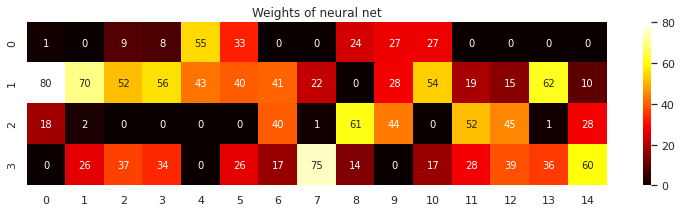

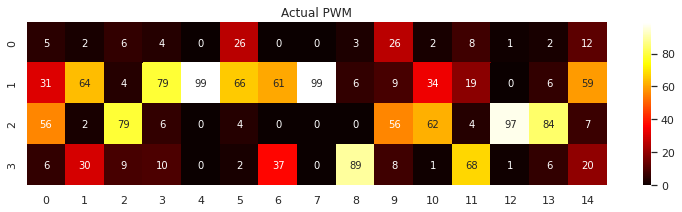

In [ ]:
#have a look at the filter
convlayer = model.layers[0]
weights = convlayer.get_weights()[0].squeeze()
print('Convolution parameter shape: {}'.format(weights.shape))

weights = np.apply_along_axis(my_softmax, 1, weights)

weights = weights * 100
weights = weights.astype(int)

fig=plt.figure(figsize=(13, 3))
heatmap(np.transpose(weights),  annot=True, fmt="d", cmap="hot")
plt.title("Weights of neural net")
plt.show()


fig=plt.figure(figsize=(13, 3))
heatmap(np.transpose((actualPWM * 100).astype(int)), annot=True, fmt="d", cmap="hot")
plt.title("Actual PWM")
plt.show()

In [ ]:
# actual PWM
actualPWM = np.array([[0.0540, 0.3180, 0.5660, 0.0620],
    [0.0240, 0.6460, 0.0240, 0.3060],
    [0.0680, 0.0420, 0.7920, 0.0980],
    [0.0420, 0.7900, 0.0620, 0.1060],
    [     0, 0.9940,      0, 0.0060],
    [0.2620, 0.6660, 0.0460, 0.0260],
    [0.0040, 0.6180, 0.0020, 0.3760],
    [     0, 0.9980, 0.0020,      0],
    [0.0320, 0.0640, 0.0080, 0.8960],
    [0.2660, 0.0900, 0.5640, 0.0800],
    [0.0200, 0.3440, 0.6200, 0.0160],
    [0.0800, 0.1940, 0.0440, 0.6820],
    [0.0100, 0.0020, 0.9760, 0.0120],
    [0.0260, 0.0660, 0.8400, 0.0680],
    [0.1260, 0.5940, 0.0740, 0.2060]])


num2seq = ['A','C','G','T']
''.join([num2seq[np.argmax(actualPWM[i,:])] for i in range(actualPWM.shape[0])])  

'GCGCCCCCTGGTGGC'

In [ ]:
# predict highest strength sequence
num2seq = ['A','C','G','T']
''.join([num2seq[np.argmax(weights[i,:])] for i in range(weights.shape[0])])  

'CCCCACCTGGCGGCT'

In [ ]:
# predict lowest strength sequence
num2seq = ['A','C','G','T']
''.join([num2seq[np.argmin(weights[i,:])] for i in range(weights.shape[0])])

'TAGGGGAACTGAAAA'

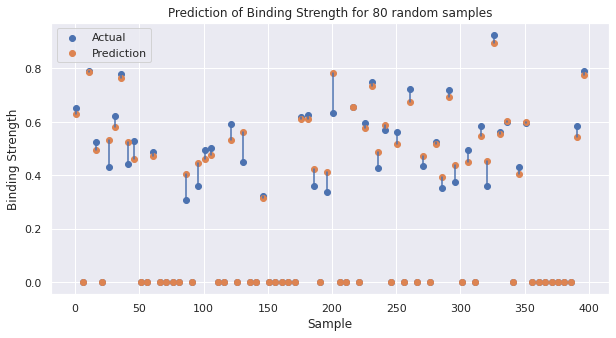

In [ ]:
# Test the model
pred = model.predict(X_test)
# pred = model.predict(X)

pred = pred.reshape((pred.shape[0],))

fig=plt.figure(figsize=(10, 5))

plt.scatter(np.arange(1,400, 8), y_test[0:399:8], label="Actual")
# plt.scatter(np.arange(1,400, 8), pred[0:399:8], label="Prediction")

colrs = []

for i in range(pred.shape[0]):
  if abs(pred[i]-y_test[i]) < 0.1:
    colrs.append('green')
  elif abs(pred[i]-y_test[i]) < 0.2:
    colrs.append('yellow')
  else:
    colrs.append('red')

for i in range(0, 399, 8):
  plt.plot([i+1, i+1], [pred[i], y_test[i]], c=colrs[i])
plt.xlabel('Sample')
plt.ylabel('Binding Strength')
plt.title('Prediction of Binding Strength for 80 random samples')
plt.legend(loc='upper left')
plt.show()

In [ ]:
pred = pred.reshape((pred.shape[0],))

fig=plt.figure(figsize=(25, 5))

plt.scatter(np.arange(1,800, 8), y_test[0:799:8], label="Actual")

# plt.scatter(np.arange(1,800, 8), pred[0:799:8], label="Prediction")

for i in range(0, 799, 8):
  plt.plot([i+1, i+1], [pred[i], y_test[i]], c=colrs[i])
  # plt.plot([i+1, i+1], [pred[i], y[i]], 'b')
plt.xlabel('Sample')
plt.ylabel('Binding Strength')
plt.title('Prediction of Binding Strength for 100 random samples')
plt.legend(loc='upper left')
plt.show()

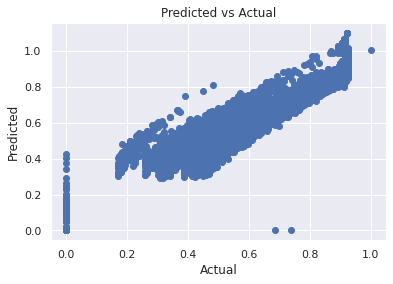

In [ ]:
plt.scatter(y_test, pred)
# plt.scatter(y, pred)
# Plot
plt.title('Predicted vs Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

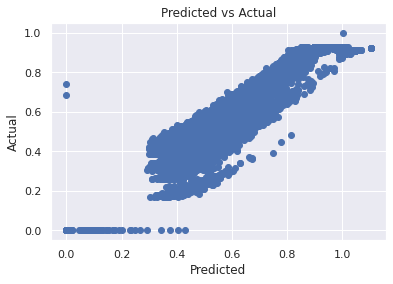

In [ ]:
plt.scatter(pred, y_test)
# plt.scatter(pred, y)
# Plot
plt.title('Predicted vs Actual')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
y_test[:10]

array([2.47, 1.96, 0.  , 3.13, 2.8 , 3.3 , 2.8 , 2.32, 2.06, 2.48])

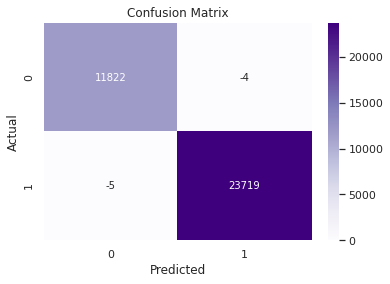

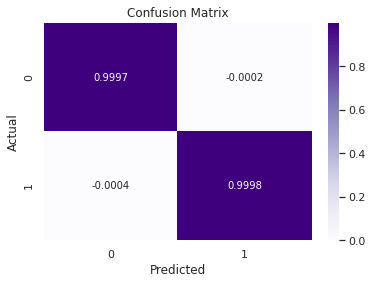

In [ ]:
true_positives = 0
false_positives = 0
true_negatives = 0
false_negatives = 0

for i in range(pred.shape[0]):
  if pred[i] > 0.3 and y_test[i] > 0:
    true_positives += 1
  elif pred[i] <= 0.3 and y_test[i] > 0:
    false_negatives += 1
  elif pred[i] > 0.3 and y_test[i] == 0:
    false_positives += 1
  elif pred[i] <= 0.3 and y_test[i] == 0:
    true_negatives += 1

confusion = [[true_negatives, false_positives], [false_negatives, true_positives]]
confusion = np.array(confusion)
confusion = - confusion
np.fill_diagonal(confusion, - confusion.diagonal())
heatmap(confusion, annot=True, fmt="d", cmap="Purples")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


total_positive = (true_positives + false_negatives)
total_negative = (true_negatives + false_positives)

true_positives = true_positives / total_positive
false_positives = false_positives / total_positive
true_negatives = true_negatives / total_negative
false_negatives = false_negatives / total_negative

confusion = [[true_negatives, false_positives], [false_negatives, true_positives]]
confusion = np.array(confusion)
confusion = - confusion
np.fill_diagonal(confusion, - confusion.diagonal())
heatmap(confusion, annot=True, fmt=".4f", cmap="Purples")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()